### Monty Hall Problem

In [39]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_dark"

In [33]:
# Winner door

results = []

for _ in range(10000):
    doors = [0, 1, 2]

    # Select winner door
    door_winner = np.random.choice(doors)

    # Select a door
    door_selected = np.random.choice(doors)

    # Get available doors for monty
    doors_available = np.delete(doors, [door_winner, door_selected])

    # Monty opens a door
    door_opened = np.random.choice(doors_available)

    # Decide to change your door or not
    do_change = np.random.choice([True, False])

    # Determine result
    if do_change:
        winner = door_selected != door_winner
    else:
        winner = door_selected == door_winner

    # Assemble result
    result = {
        'door_winner': door_winner,
        'door_selected': door_selected,
        'door_available': list(doors_available),
        'door_opened': door_opened,
        'do_change': do_change,
        'winner': winner
    }
    
    results += [result]


In [34]:
df = pd.DataFrame.from_dict(results)

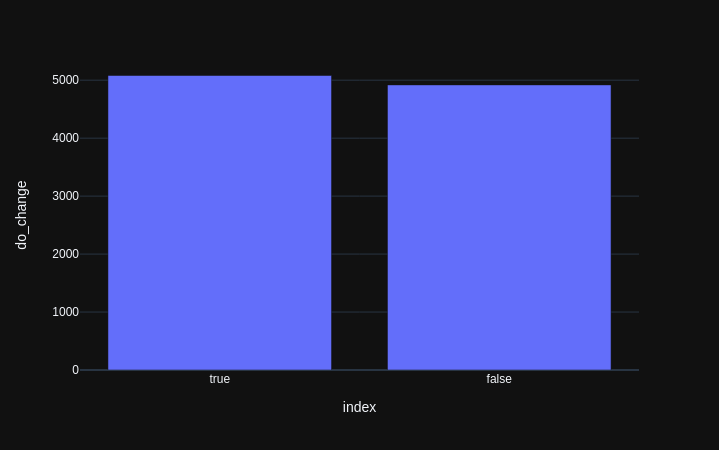

In [40]:
px.bar(df['do_change'].value_counts().to_frame().reset_index(), x='index', y='do_change')

In [43]:
df.groupby(['winner', 'do_change']).count()

door_winner  door_selected  door_available  door_opened
winner do_change                                                         
False  False             3303           3303            3303         3303
       True              1664           1664            1664         1664
True   False             1616           1616            1616         1616
       True              3417           3417            3417         3417

In [67]:
for index, row in df.iterrows():
    won = (df.loc[:index, 'do_change'] == True) & (df.loc[:index, 'winner'] == True)
    changed = (df.loc[:index, 'do_change'] == True)
    try:
        won_count = won.value_counts()[True]
    except:
        won_count = 0
        
    try:
        changed_count = changed.value_counts()[True]
    except:
        changed_count = 0
    df.loc[index, 'ratio'] = won_count / changed_count
    

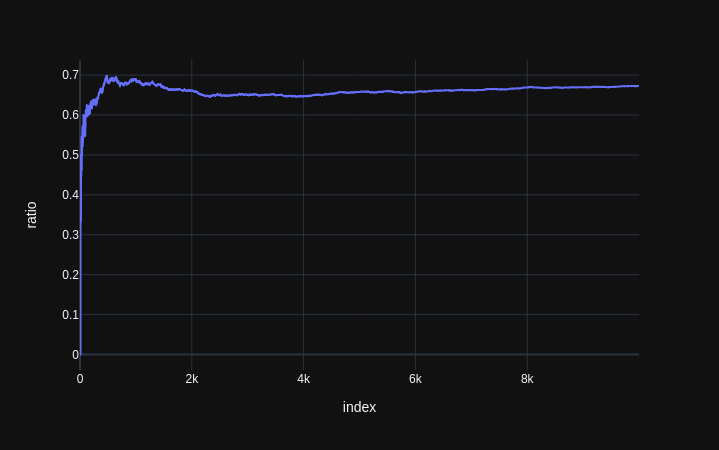

In [68]:
px.line(df.reset_index(), x='index', y='ratio')